# Pytorch basics

Adapted from [Pytorch tutorial for Deep Learning researchers](https://github.com/yunjey/pytorch-tutorial) (Yunvey Choi, 2018).

Used as part of Deep Learning, Gilles Louppe, 2018.

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch 
import torchvision
import torch.nn as nn
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch import Tensor

# Basic autograd example 1

In [9]:
# Create tensors.
x = Variable(torch.Tensor([1]), requires_grad=True)
w = Variable(torch.Tensor([2]), requires_grad=True)
b = Variable(torch.Tensor([3]), requires_grad=True)

In [10]:
# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor([ 2.])
tensor([ 1.])
tensor([ 1.])


# Basic autograd example 2

In [11]:
# Create tensors.
x = Variable(torch.randn(5, 3))
y = Variable(torch.randn(5, 2))

# Build a linear layer.
linear = nn.Linear(3, 2)
print('w: ', linear.weight)
print('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.1606, -0.2023, -0.2097],
        [-0.1739, -0.1991,  0.3709]])
b:  Parameter containing:
tensor([-0.4924,  0.3264])


In [12]:
# Forward propagation.
pred = linear(x)
print(pred)

tensor([[-0.8493,  0.6611],
        [-0.0285, -0.1789],
        [-0.4383,  0.2935],
        [-1.1135,  0.8354],
        [-0.8782,  0.3771]])


In [16]:
# Build Loss and Optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss)

loss:  tensor(0.9233)


In [17]:
# Backpropagation.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[ 0.0411, -0.4861, -0.1422],
        [-0.4637,  0.7247,  0.3509]])
dL/db:  tensor([-0.6549, -0.0802])


In [23]:
# 1-step Optimization (gradient descent).
optimizer.step()

# You can also do optimization at the low level as shown below.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after optimization.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss)

loss after 1 step optimization:  tensor(0.8351)


# Load data from numpy

In [24]:
a = np.array([[1,2], [3,4]])
b = torch.from_numpy(a)      # convert numpy array to torch tensor
c = b.numpy()                # convert torch tensor to numpy array

# Implementing the input pipeline

In [25]:
# Download and construct dataset.
train_dataset = dsets.CIFAR10(root='./data/',
                              train=True, 
                              transform=transforms.ToTensor(),
                              download=True)

Files already downloaded and verified


In [26]:
# Select one data pair (read data from disk).
image, label = train_dataset[7]
print(image.size())
print(label)

torch.Size([3, 32, 32])
7


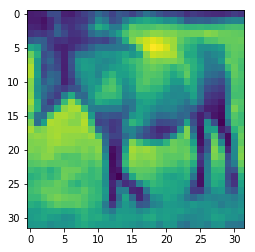

In [27]:
plt.imshow(image.numpy()[0])

In [ ]:
# Data Loader (this provides queue and thread in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100, 
                                           shuffle=True,
                                           num_workers=2)

# When iteration starts, queue and thread start to load dataset from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of data loader is as below.
for images, labels in train_loader:
    # Your training code will be written here
    pass

# Input pipeline for custom dataset

In [ ]:
# You should build custom dataset as below.
class CustomDataset(data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file path or list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# Then, you can just use prebuilt torch's data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=100, 
                                           shuffle=True,
                                           num_workers=2)

# Using pretrained model

In [28]:
# Download and load pretrained resnet.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only top layer of the model.
for param in resnet.parameters():
    param.requires_grad = False
    
# Replace top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is for example.

In [29]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_parameters(resnet))

51300


In [30]:
# For test.
images = Variable(torch.randn(10, 3, 224, 224))
outputs = resnet(images)
print(outputs)  

tensor([[-6.1075e-01,  7.0930e-02,  2.6105e-01, -6.7475e-01,  6.3653e-01,
          1.2123e+00,  4.2108e-01, -8.8963e-01, -1.3060e+00,  4.1609e-01,
          1.1532e+00,  4.9391e-01, -4.3752e-01, -1.1471e+00,  2.3653e-01,
         -7.0296e-01, -1.7490e+00, -6.7773e-01,  1.3543e-01,  1.4686e-01,
         -2.6193e-01, -2.7555e-01, -9.3959e-01, -1.2435e-01,  7.6445e-01,
          3.2169e-01,  1.1246e-01,  6.2941e-01, -1.0844e+00,  1.4906e-01,
         -5.5501e-01,  5.3076e-01,  8.0745e-01, -1.0190e+00, -3.0159e-02,
          4.6869e-01, -4.1443e-01,  2.7649e-01, -1.1812e-01,  4.2097e-01,
          2.0254e-01, -4.7321e-01, -7.0366e-01, -6.0260e-01, -4.0150e-01,
          8.6344e-01,  8.4182e-01,  8.4273e-01, -1.2438e-01, -1.3241e-01,
         -1.4839e+00,  5.9488e-01, -1.1306e+00,  6.8635e-01,  7.5239e-01,
         -2.0169e-01, -8.4294e-01,  3.0718e-01,  1.5249e-01,  2.3007e-01,
         -4.5041e-01, -4.0602e-01,  1.2089e-01, -1.7432e-02,  1.7105e+00,
          9.1819e-01, -5.5296e-01, -5.

# Save and load model

In [ ]:
# Save and load the entire model.
torch.save(resnet, 'model.pkl')
model = torch.load('model.pkl')

# Save and load only the model parameters(recommended).
torch.save(resnet.state_dict(), 'params.pkl')
resnet.load_state_dict(torch.load('params.pkl'))